In [34]:
import sys
import spotipy
import spotipy.util as util
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import random
import nltk
from nltk.corpus import stopwords

In [46]:
artist = "Downstait"
song_name = "Kingdom"
# create a valid url for web scrapping using song name and artist
song_url = '{}-{}-lyrics'.format(str(artist).strip().replace(' ', '-'),
                                 str(song_name).strip().replace(' ', '-'))

print('\nSong: {}\nArtist: {}'.format(song_name, artist))



Song: Kingdom
Artist: Downstait


In [47]:
# New request using song_url created before
request = requests.get("https://genius.com/{}".format(song_url))

# Verify status_code of request
if request.status_code == 200:
    # BeautifulSoup library return an html code
    html_code = BeautifulSoup(request.text, features="html.parser")
    # Extract lyrics from beautifulsoup response using the correct prefix {"class": "lyrics"}
    lyrics = html_code.find("div", {"class": "lyrics"}).get_text().strip()
    print(lyrics)

else:
    print("Song not found")

[Verse 1}
Adrenaline, in my soul
Every thought, out of control
Do it all to get them off their feet
Crowd is here, about to blow
Waitin' for me to start the show
Out the curtain, lights go up I'm home
(Whoa!)
And my father said, when I was younger
Hard times breed better men (better men!)

[Chorus]
You took it all away, I give it all away
Can't take my freedom
Here to change the game, a banner made of pain
I built my kingdom
Now you bow to me
You took my dreams but not my name
You'll follow me until the end
I am my kingdom

[Verse 2]
Lights go down, I'm ready now
Tear this roof off for the town
Gonna give 'em what they came to see
Hear the crowd, on their toes
Ready for me to start the show
Out the curtain, lights go up I'm home
(Whoa!)
And my father said, when I was younger
Hard times breed better men (better men!)

[Chorus]
You took it all away, I give it all away
Can't take my freedom
Here to change the game, a banner made of pain
I built my kingdom
Now you bow to me
You took my dre

In [58]:
def removebrackets(text):
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

import re 
def remove_notes(text):
    return re.sub("[\(\[].*?[\)\]\}]", "", text)

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_stopwords(text):
    stopword_list = set(stopwords.words('english'))
    stopword_list.add("nt")
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

In [59]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [60]:
lyrics_new = remove_notes(lyrics)
lyrics_new

"\nAdrenaline, in my soul\nEvery thought, out of control\nDo it all to get them off their feet\nCrowd is here, about to blow\nWaitin' for me to start the show\nOut the curtain, lights go up I'm home\n\nAnd my father said, when I was younger\nHard times breed better men \n\n\nYou took it all away, I give it all away\nCan't take my freedom\nHere to change the game, a banner made of pain\nI built my kingdom\nNow you bow to me\nYou took my dreams but not my name\nYou'll follow me until the end\nI am my kingdom\n\n\nLights go down, I'm ready now\nTear this roof off for the town\nGonna give 'em what they came to see\nHear the crowd, on their toes\nReady for me to start the show\nOut the curtain, lights go up I'm home\n\nAnd my father said, when I was younger\nHard times breed better men \n\n\nYou took it all away, I give it all away\nCan't take my freedom\nHere to change the game, a banner made of pain\nI built my kingdom\nNow you bow to me\nYou took my dreams but not my name\nYou'll follow 

In [61]:
lyrics_new = remove_special_chars(lyrics_new)
lyrics_new

'\nAdrenaline in my soul\nEvery thought out of control\nDo it all to get them off their feet\nCrowd is here about to blow\nWaitin for me to start the show\nOut the curtain lights go up Im home\n\nAnd my father said when I was younger\nHard times breed better men \n\n\nYou took it all away I give it all away\nCant take my freedom\nHere to change the game a banner made of pain\nI built my kingdom\nNow you bow to me\nYou took my dreams but not my name\nYoull follow me until the end\nI am my kingdom\n\n\nLights go down Im ready now\nTear this roof off for the town\nGonna give em what they came to see\nHear the crowd on their toes\nReady for me to start the show\nOut the curtain lights go up Im home\n\nAnd my father said when I was younger\nHard times breed better men \n\n\nYou took it all away I give it all away\nCant take my freedom\nHere to change the game a banner made of pain\nI built my kingdom\nNow you bow to me\nYou took my dreams but not my name\nYoull follow me until the end\nI am

In [62]:
lyrics_new = remove_stopwords(lyrics_new)
lyrics_new

'Adrenaline soul Every thought control Do get feet Crowd blow Waitin start show Out curtain lights go Im home And father said I younger Hard times breed better men You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom Lights go Im ready Tear roof town Gon na give em came see Hear crowd toes Ready start show Out curtain lights go Im home And father said I younger Hard times breed better men You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom You tried tell I saw door kicked I stepped right right And never stop I king youre crown Now watch I take throne And rule kingdom You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom You took away I give away Cant take freedom Here change game banner made pain I b

In [63]:
# Brian Fallon 21 Days
# lyrics_new = "Its easy To fall love Its hard To get lost Down river I miss In morning We used talk Over coffee But Im gon na find Another friend When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Its nice In night Yeah breathe You would lie And say friend Im waiting On rapture Trying minimize The damage And hoping To keep idle Hands occupied When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Call breaking habit Call falling love Call breaking habit One day time When We leaving We crying We healing And say 21 days till I dont miss 21 days till I dont miss Call breaking habit One day time Call breaking habit One day time I transformed Out mind Call breaking habit"

# Fozzy Judas
#lyrics_new = "You beautiful inside You innocence personified And I drag sell Run away I cold like December snow I carved soul made stone And I drag sell Embraced darkness Im losing light Encircled demons I fight What I become Now Ive betrayed Everyone Ive ever loved I pushed away And I slave Judas mind Is something left save In wreckage life My life Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Judas mind Oh guilt heavy cross There blood path I walk And step I take haunting Embraced darkness Im losing light Encircled demons I fight What I become Now Ive betrayed Everyone Ive ever loved I pushed away And I slave Judas mind Is something left save In wreckage life My life Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Judas mind Judas mind What I become Now Ive betrayed Everyone Ive ever loved I pushed away And I slave Judas mind Is something left save In wreckage life My life Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Judas mind"
#https://www.deviantart.com/ambriegnsasylum16/art/Le-Champion-Chris-Jericho-AEW-PNG-822521883

# Downstait Kingdom
lyrics_new = "Adrenaline soul Every thought control Do get feet Crowd blow Waitin start show Out curtain lights go Im home And father said I younger Hard times breed better men You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom Lights go Im ready Tear roof town Gon na give em came see Hear crowd toes Ready start show Out curtain lights go Im home And father said I younger Hard times breed better men You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom You tried tell I saw door kicked I stepped right right And never stop I king youre crown Now watch I take throne And rule kingdom You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom"
#https://www.tvinsider.com/840524/cody-rhodes-all-elite-wrestling/

lyrics_new


'Adrenaline soul Every thought control Do get feet Crowd blow Waitin start show Out curtain lights go Im home And father said I younger Hard times breed better men You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom Lights go Im ready Tear roof town Gon na give em came see Hear crowd toes Ready start show Out curtain lights go Im home And father said I younger Hard times breed better men You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom You tried tell I saw door kicked I stepped right right And never stop I king youre crown Now watch I take throne And rule kingdom You took away I give away Cant take freedom Here change game banner made pain I built kingdom Now bow You took dreams name Youll follow end I kingdom You took away I give away Cant take freedom Here change game banner made pain I b

Generating word cloud....
Making plot


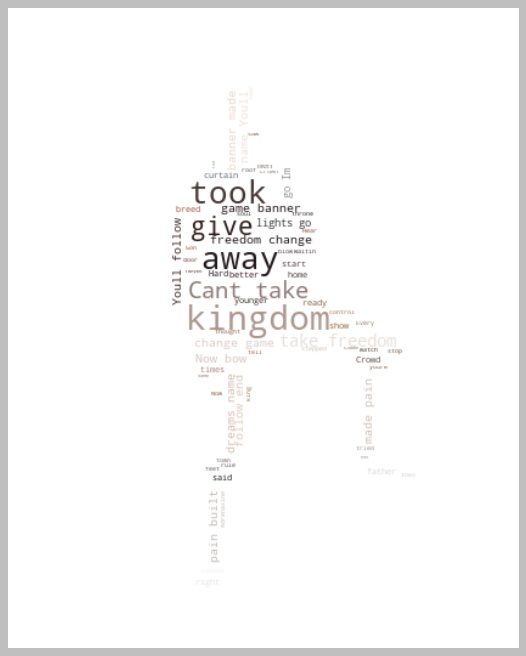

In [65]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator

char_mask = np.array(Image.open("cody.jpg"))

# generate wordcloud
print('Generating word cloud....')
wc = WordCloud(background_color="white", max_words=200, mask=char_mask, random_state=42)
#wc = WordCloud().generate(lyrics_new)
wc.generate(lyrics_new)
print('Making plot')

image_colors = ImageColorGenerator(char_mask)
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud_white.png', dpi=200)
plt.show()


Generating word cloud....
Making plot


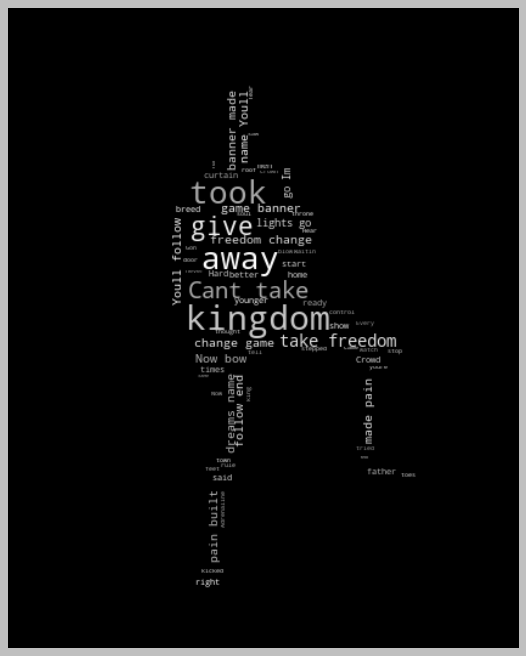

In [66]:
# generate word cloud
print('Generating word cloud....')
wc = WordCloud(background_color="black", max_words=200, mask=char_mask, random_state=42)
wc.generate(lyrics_new)
print('Making plot')

image_colors = ImageColorGenerator(char_mask)
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.imshow(wc.recolor(color_func=grey_color_func))

#plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud_black.png', dpi=200)
plt.show()

In [24]:
lyrics_new
#https://genius.com/

'You beautiful inside You innocence personified And I drag sell Run away I cold like December snow I carved soul made stone And I drag sell Embraced darkness Im losing light Encircled demons I fight What I become Now Ive betrayed Everyone Ive ever loved I pushed away And I slave Judas mind Is something left save In wreckage life My life Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Judas mind Oh guilt heavy cross There blood path I walk And step I take haunting Embraced darkness Im losing light Encircled demons I fight What I become Now Ive betrayed Everyone Ive ever loved I pushed away And I slave Judas mind Is something left save In wreckage life My life Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Im becom Im becom Im becoming Im becom Im becom Im becoming Judas Judas mind Judas mind Judas mind What I become Now Ive betrayed Everyone Ive ever lo

In [32]:
wc.words_

{'Im becom': 1.0,
 'becom Im': 1.0,
 'Judas mind': 0.5416666666666666,
 'Im becoming': 0.5,
 'Ive': 0.25,
 'Judas': 0.25,
 'life': 0.25,
 'away': 0.16666666666666666,
 'slave': 0.125,
 'become Now': 0.125,
 'betrayed Everyone': 0.125,
 'loved pushed': 0.125,
 'something left': 0.125,
 'left save': 0.125,
 'save wreckage': 0.125,
 'drag': 0.08333333333333333,
 'sell': 0.08333333333333333,
 'Embraced': 0.08333333333333333,
 'darkness': 0.08333333333333333,
 'losing': 0.08333333333333333,
 'light': 0.08333333333333333,
 'Encircled': 0.08333333333333333,
 'demons': 0.08333333333333333,
 'fight': 0.08333333333333333,
 'beautiful': 0.041666666666666664,
 'inside': 0.041666666666666664,
 'innocence': 0.041666666666666664,
 'personified': 0.041666666666666664,
 'Run': 0.041666666666666664,
 'cold': 0.041666666666666664,
 'December': 0.041666666666666664,
 'snow': 0.041666666666666664,
 'carved': 0.041666666666666664,
 'soul': 0.041666666666666664,
 'made': 0.041666666666666664,
 'stone': 0.041

In [38]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [45]:
d = word_count(lyrics_new)
import operator
sorted(d.items(), key=operator.itemgetter(1), reverse=True)

[('Im', 38),
 ('becom', 24),
 ('Judas', 19),
 ('I', 17),
 ('mind', 13),
 ('becoming', 12),
 ('And', 6),
 ('Ive', 6),
 ('life', 6),
 ('away', 4),
 ('What', 3),
 ('become', 3),
 ('Now', 3),
 ('betrayed', 3),
 ('Everyone', 3),
 ('ever', 3),
 ('loved', 3),
 ('pushed', 3),
 ('slave', 3),
 ('Is', 3),
 ('something', 3),
 ('left', 3),
 ('save', 3),
 ('In', 3),
 ('wreckage', 3),
 ('My', 3),
 ('You', 2),
 ('drag', 2),
 ('sell', 2),
 ('Embraced', 2),
 ('darkness', 2),
 ('losing', 2),
 ('light', 2),
 ('Encircled', 2),
 ('demons', 2),
 ('fight', 2),
 ('beautiful', 1),
 ('inside', 1),
 ('innocence', 1),
 ('personified', 1),
 ('Run', 1),
 ('cold', 1),
 ('like', 1),
 ('December', 1),
 ('snow', 1),
 ('carved', 1),
 ('soul', 1),
 ('made', 1),
 ('stone', 1),
 ('Oh', 1),
 ('guilt', 1),
 ('heavy', 1),
 ('cross', 1),
 ('There', 1),
 ('blood', 1),
 ('path', 1),
 ('walk', 1),
 ('step', 1),
 ('take', 1),
 ('haunting', 1)]